In [1]:
from torch_smodel import *

# 1. Cargamos los datos

In [2]:
df = pd.read_csv('df_integrity.csv')

In [3]:
df

,Theta,Rho
0,0.058802,0.494838
1,3.135673,0.339509
2,0.712411,0.619429
3,0.313996,0.977530
4,4.306543,0.096433
5,3.059836,0.744206
6,5.640147,0.292499
7,4.068061,0.298675
8,5.635786,0.752473
9,4.531024,0.018664


In [5]:
N, K = 21, 15
n = 10**3

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, tau=0.1)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')
    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, tau=0.1)

    X += (E==0)*1
    df_res += df2
X = X/n
df_res = df_res/n


Epoch 100/1000
Epoch 200/1000
Epoch 300/1000
Epoch 400/1000
Epoch 500/1000
Epoch 600/1000
Epoch 700/1000
Epoch 800/1000
Epoch 900/1000


<AxesSubplot:>

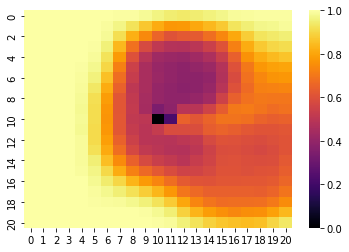

In [6]:
import seaborn as sns

sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

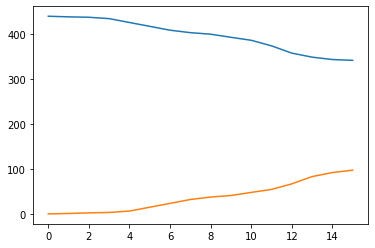

In [8]:
plt.plot(df_res[['Susceptibles', 'Deads']])

In [9]:
df_res

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,440.000,1.000,0.000
1,0.058802,1.0,0.494838,1.0,438.675,1.325,1.000
2,3.135673,2.0,0.339509,1.0,437.742,0.933,2.325
3,0.712411,1.0,0.619429,2.0,434.665,3.077,3.258
4,0.313996,1.0,0.97753,3.0,426.088,8.577,6.335
5,4.306543,3.0,0.096433,1.0,417.559,8.529,14.912
6,3.059836,2.0,0.744206,2.0,408.920,8.639,23.441
7,5.640147,4.0,0.292499,1.0,403.471,5.449,32.080
8,4.068061,3.0,0.298675,1.0,400.048,3.423,37.529
9,5.635786,4.0,0.752473,2.0,393.139,6.909,40.952


In [10]:
df_res2 = pd.read_csv('integrity_numpy.csv')

In [11]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,-0.0,0.0,-0.2068,0.2068,0.0000
2,-0.0,0.0,0.0,0.0,-1.0118,0.8050,0.2068
3,-0.0,0.0,-0.0,0.0,-3.5823,2.5705,1.0118
4,-0.0,0.0,-0.0,0.0,-10.7410,7.1587,3.5823
5,-0.0,0.0,0.0,0.0,-17.9502,7.2092,10.7410
6,0.0,0.0,0.0,0.0,-25.4597,7.5095,17.9502
7,-0.0,0.0,0.0,0.0,-30.1643,4.7046,25.4597
8,0.0,0.0,0.0,0.0,-32.9698,2.8055,30.1643
9,-0.0,0.0,0.0,0.0,-38.8054,5.8356,32.9698


In [12]:
P[8:13, 8:13, 1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0059, 0.0059, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]], dtype=torch.float64)

In [ ]:
E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, tau=0.1)

In [ ]:
E[6:14, 6:14, 1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int8)

# 2. Probamos con $\Delta_{ID}=2$

## 2.1. Usamos $\tau=1$

In [14]:
N, K = 21, 15
n = 10**3

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')
    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, tau=0.1)

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2)

    X += (E==0)*1
    df_res += df2
X = X/n
df_res = df_res/n

Epoch 100/1000
Epoch 200/1000
Epoch 300/1000
Epoch 400/1000
Epoch 500/1000
Epoch 600/1000
Epoch 700/1000
Epoch 800/1000
Epoch 900/1000


<AxesSubplot:>

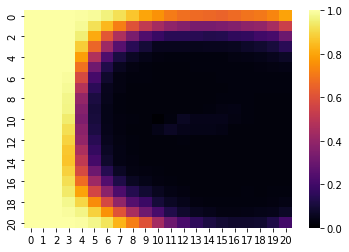

In [15]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

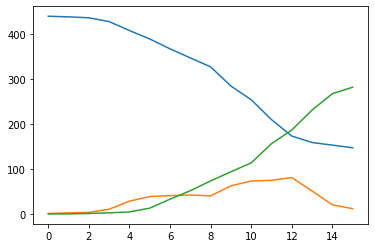

In [16]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

In [17]:
df_res2 = pd.read_csv('integrity_numpy_2.csv')

In [18]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,-0.0,0.0,-0.2408,0.2408,0.0000
2,-0.0,0.0,0.0,0.0,-1.1750,1.1750,0.0000
3,-0.0,0.0,-0.0,0.0,-2.1276,1.8868,0.2408
4,-0.0,0.0,-0.0,0.0,-5.2633,4.0883,1.1750
5,-0.0,0.0,0.0,0.0,-9.3111,7.1835,2.1276
6,0.0,0.0,0.0,0.0,-15.8128,10.5495,5.2633
7,-0.0,0.0,0.0,0.0,-19.4573,10.1462,9.3111
8,0.0,0.0,0.0,0.0,-20.9650,5.1522,15.8128
9,-0.0,0.0,0.0,0.0,-22.9773,3.5200,19.4573


## 2.1. Usamos $\tau=0.1$

In [19]:
N, K = 21, 15
n = 10**3
tau = 0.1

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2, tau=tau)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')
    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, tau=0.1)

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2, tau=tau)

    X += (E==0)*1
    df_res += df2
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')

X = X/n
df_res = df_res/n

Epoch 100/1000
Epoch 100/1000
Epoch 200/1000
Epoch 200/1000
Epoch 300/1000
Epoch 300/1000
Epoch 400/1000
Epoch 400/1000
Epoch 500/1000
Epoch 500/1000
Epoch 600/1000
Epoch 600/1000
Epoch 700/1000
Epoch 700/1000
Epoch 800/1000
Epoch 800/1000
Epoch 900/1000
Epoch 900/1000


KeyboardInterrupt: 

In [20]:
X = X/seed
df_res = df_res/seed

<AxesSubplot:>

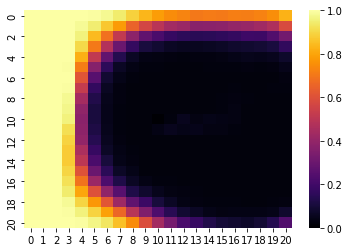

In [21]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

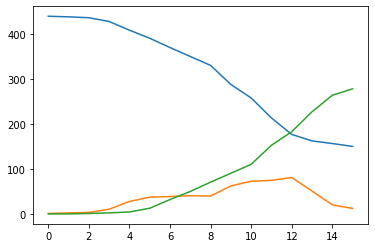

In [22]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

In [23]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,0.0,0.0,-0.0,0.0,-0.203072,0.203072,0.000000
2,-0.0,0.0,0.0,0.0,-1.069175,1.069175,0.000000
3,-0.0,0.0,-0.0,0.0,-1.923846,1.720774,0.203072
4,-0.0,0.0,-0.0,0.0,-4.451204,3.382028,1.069175
5,-0.0,0.0,0.0,0.0,-7.654433,5.730588,1.923846
6,0.0,0.0,0.0,0.0,-12.976002,8.524798,4.451204
7,-0.0,0.0,0.0,0.0,-16.264546,8.610112,7.654433
8,0.0,0.0,0.0,0.0,-17.692825,4.716823,12.976002
9,-0.0,0.0,0.0,0.0,-19.532905,3.268360,16.264546


## 2.3. Usamos $\tau = 10^5$

In [24]:
N, K = 21, 15
n = 10**3
tau = 10**5

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2, tau=tau)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')
    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, tau=0.1)

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2, tau=tau)

    X += (E==0)*1
    df_res += df2
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')

X = X/n
df_res = df_res/n

Epoch 100/1000
Epoch 100/1000
Epoch 200/1000
Epoch 200/1000
Epoch 300/1000
Epoch 300/1000
Epoch 400/1000
Epoch 400/1000
Epoch 500/1000
Epoch 500/1000
Epoch 600/1000
Epoch 600/1000
Epoch 700/1000
Epoch 700/1000
Epoch 800/1000
Epoch 800/1000
Epoch 900/1000
Epoch 900/1000


<AxesSubplot:>

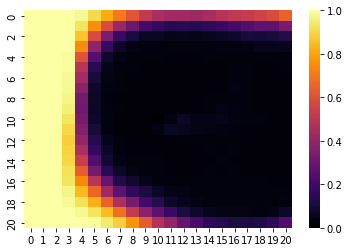

In [25]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

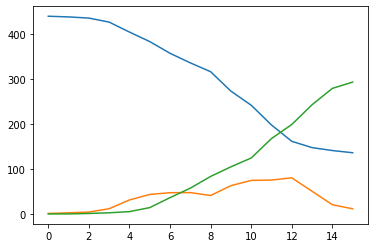

In [26]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

In [27]:
df_res2 = pd.read_csv('integrity_numpy_2.csv')
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,-0.0,0.0,-0.3708,0.3708,0.0000
2,-0.0,0.0,0.0,0.0,-1.8510,1.8510,0.0000
3,-0.0,0.0,-0.0,0.0,-3.2976,2.9268,0.3708
4,-0.0,0.0,-0.0,0.0,-8.6723,6.8213,1.8510
5,-0.0,0.0,0.0,0.0,-15.0771,11.7795,3.2976
6,0.0,0.0,0.0,0.0,-25.7118,17.0395,8.6723
7,-0.0,0.0,0.0,0.0,-30.5303,15.4532,15.0771
8,0.0,0.0,0.0,0.0,-31.7330,6.0212,25.7118
9,-0.0,0.0,0.0,0.0,-34.3253,3.7950,30.5303
